## Define an "apoted user"

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [135]:
df_eng = pd.read_csv('takehome_user_engagement.csv')

In [136]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [137]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [138]:
# convert time_stamp to datetime
df_eng.time_stamp = pd.to_datetime(df_eng.time_stamp, format = '%Y-%m-%d %H:%M:%S')

In [139]:
df_eng.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [140]:
# 'visited' is not a helpful column, so drop it
# df_eng.drop('visited', axis = 1, inplace=True)

In [141]:
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [142]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [143]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [144]:
# rename 'object_id' to 'user_id'
df_users.rename(columns={'object_id': 'user_id'}, inplace=True)

In [145]:
df_users.creation_time = pd.to_datetime(df_users.creation_time, format = '%Y-%m-%d %H:%M:%S')

In [146]:
df_users.head()


,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [147]:
df_users.isna().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [148]:
# if invited_by_user_id is null, can assume that that user signed up without a guest invitation

In [149]:
# last_session_creation_time na's indicate a single sign on, so replace with creation_time


## EDA

In [150]:
df_users.creation_source.value_counts()

creation_source
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: count, dtype: int64

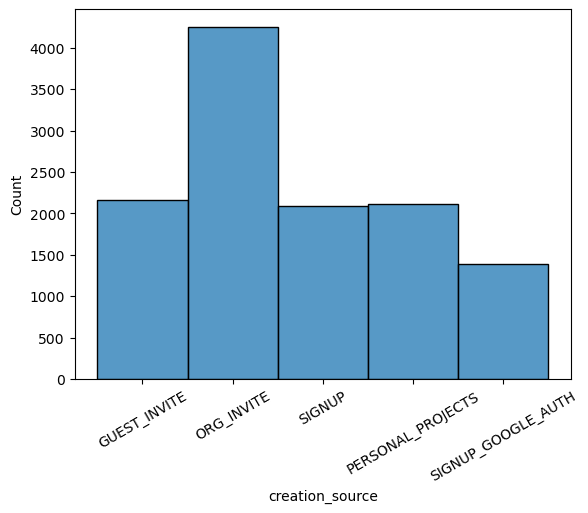

In [151]:
sns.histplot(data = df_users, x='creation_source')
plt.xticks(rotation=30);

In [152]:
# Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven ­day period, 
# identify which factors predict future user adoption.

# Number of user id's logged in per day
df_eng.groupby(df_eng.time_stamp.dt.date)['user_id'].count()
# df_eng.groupby(df_eng.time_stamp.dt.date).count()

time_stamp
2012-05-31      4
2012-06-01      6
2012-06-02      9
2012-06-03     11
2012-06-04     11
             ... 
2014-06-01    450
2014-06-02    404
2014-06-03    398
2014-06-04    373
2014-06-06      1
Name: user_id, Length: 736, dtype: int64

In [153]:
df_eng_sorted = df_eng.sort_values(by=['time_stamp'], axis = 0, ascending = True)
df_eng_sorted = df_eng_sorted.reset_index(drop=True)
df_eng_sorted.head()

,time_stamp,user_id,visited
0,2012-05-31 08:20:06,10012,1
1,2012-05-31 15:47:36,3428,1
2,2012-05-31 17:19:37,9899,1
3,2012-05-31 21:58:33,1693,1
4,2012-06-01 00:17:30,6102,1


In [154]:
df_eng_sorted.time_stamp = df_eng_sorted.time_stamp.dt.date

In [155]:
df_eng_sorted.sort_values(by=['time_stamp', 'user_id'], inplace=True)

In [156]:
df_eng_sorted.head(10)

,time_stamp,user_id,visited
3,2012-05-31,1693,1
1,2012-05-31,3428,1
2,2012-05-31,9899,1
0,2012-05-31,10012,1
6,2012-06-01,1995,1
4,2012-06-01,6102,1
8,2012-06-01,8068,1
7,2012-06-01,10163,1
9,2012-06-01,10922,1
5,2012-06-01,11430,1


In [179]:
df_eng_sorted.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [182]:
df_eng_sorted.time_stamp = pd.to_datetime(df_eng_sorted.time_stamp, format = '%Y-%m-%d')

In [215]:
# Function to identify adopted users, which is a user who has logged in at least 3 times within a 7 day window
def is_adopted(eng_df):
    # Get time range of engagement dataframe
    start, end = eng_df.time_stamp.min(), eng_df.time_stamp.max()
    # Create data frame of date range
    dates = pd.date_range(start, end).to_frame(index=False, name='time_stamp')
    # merge dates and engagement data frame
    df_adopted = dates.merge(eng_df, on='time_stamp', how='left').fillna(0)
    # Check for 3 engagements within a 7 day rolling window
    return df_adopted['visited'].rolling(7).sum().max() >= 3
     

In [209]:
adopted_users = df_eng_sorted.groupby('user_id').apply(is_adopted, include_groups=False ).reset_index(name='adopted_user')
adopted_users.head()

,user_id,adopted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [218]:
adopted_users.adopted_user.astype(int)

0       0
1       1
2       0
3       0
4       0
       ..
8818    0
8819    0
8820    0
8821    0
8822    0
Name: adopted_user, Length: 8823, dtype: int64

In [219]:
df = pd.merge(df_users, adopted_users, on='user_id', how='outer')

In [220]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [213]:
# Just to check that the number of 1.0's == number of rows in adopted_users table
df.adopted_user.value_counts()

adopted_user
False    7226
True     1597
Name: count, dtype: int64

In [245]:
len(df)

12000

In [246]:
7226+1597

8823

In [247]:
# percenct adopted users:
(1597/8823)*100

18.100419358494843

In [255]:
df.domain.value_counts()

domain
gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
lrabg.com            1
mrytw.com            1
ugtav.com            1
hqhll.com            1
iuxiw.com            1
Name: count, Length: 1184, dtype: int64

In [264]:
len(df.domain.unique())
# There are 1184 unique domainsdwith the top 5 being: gmail, yahoo, jourrapide, cuvox, gustr

1184

In [235]:
df.invited_by_user_id.value_counts()

invited_by_user_id
10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: count, Length: 2564, dtype: int64

In [234]:
df.invited_by_user_id.isna().sum()

5583

In [236]:
df['invited_by_user'] = np.where(df['invited_by_user_id'].isna(), False, True)

In [237]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited_by_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,True


In [244]:
df.adopted_user.isna().sum()

3177

In [216]:
df.org_id.value_counts()

org_id
0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: count, Length: 417, dtype: int64

In [240]:
df.org_id.isna().sum()

0

## What factors lead to an adopted user? 

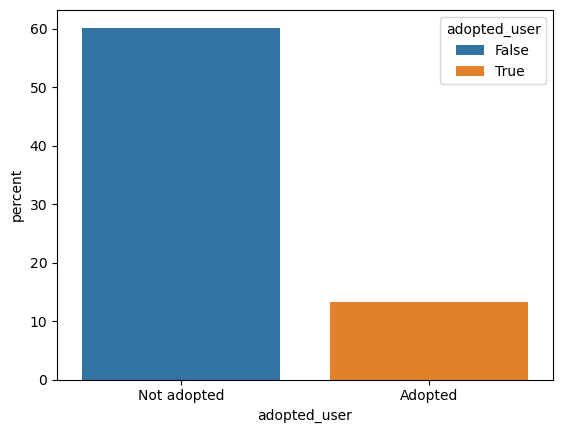

In [196]:
sns.countplot(x='adopted_user', data=df, stat='percent', hue='adopted_user')
plt.xticks([0,1], ['Not adopted', 'Adopted']);

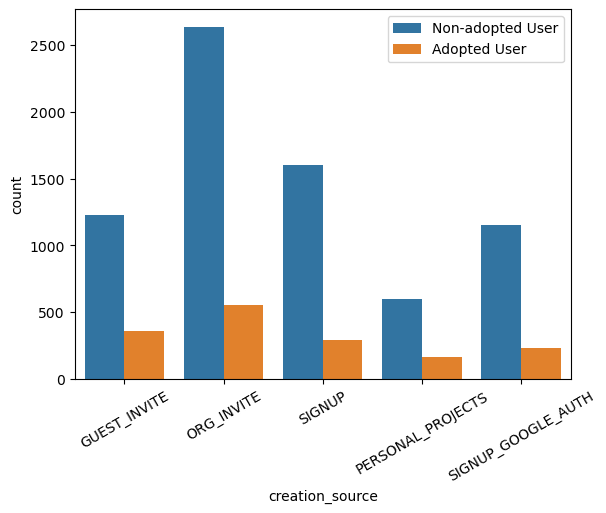

In [197]:
sns.countplot(x="creation_source", hue="adopted_user", data=df)
plt.legend(labels=["Non-adopted User", "Adopted User"], title="", loc="upper right")
plt.xticks(rotation=30);

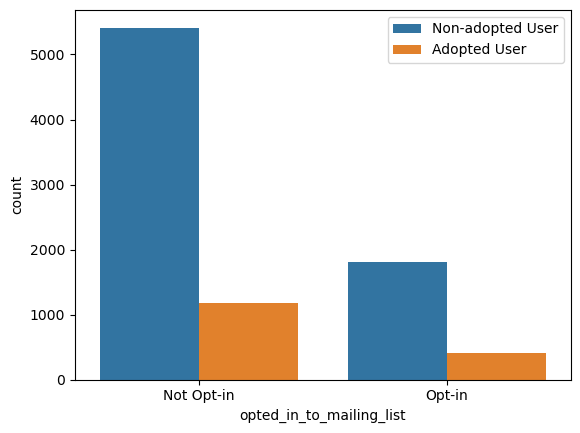

In [198]:
sns.countplot(x="opted_in_to_mailing_list", hue="adopted_user", data=df)
plt.legend(labels=["Non-adopted User", "Adopted User"], title="", loc="upper right")
plt.xticks([0,1], ['Not Opt-in', 'Opt-in']);

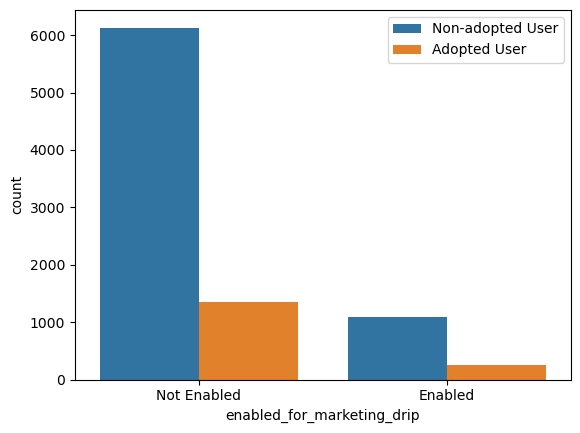

In [200]:
sns.countplot(x="enabled_for_marketing_drip", hue="adopted_user", data=df)
plt.legend(labels=["Non-adopted User", "Adopted User"], title="", loc="upper right")
plt.xticks([0,1], ['Not Enabled', 'Enabled']);

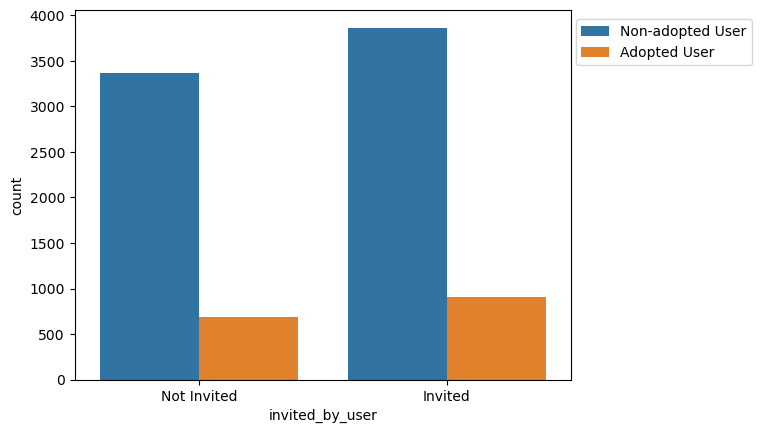

In [241]:
sns.countplot(x="invited_by_user", hue="adopted_user", data=df)
plt.legend(labels=["Non-adopted User", "Adopted User"], title="", loc=(1.01, 0.85))
plt.xticks([False, True], ['Not Invited', 'Invited']);

In [265]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited_by_user,domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,True,b'yahoo.com'
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,True,b'gustr.com'
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,True,b'gustr.com'
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,True,b'yahoo.com'
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,True,b'yahoo.com'


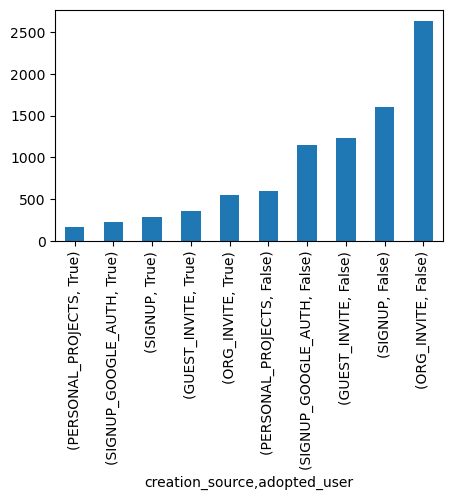

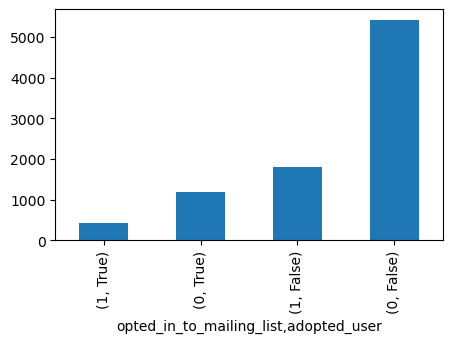

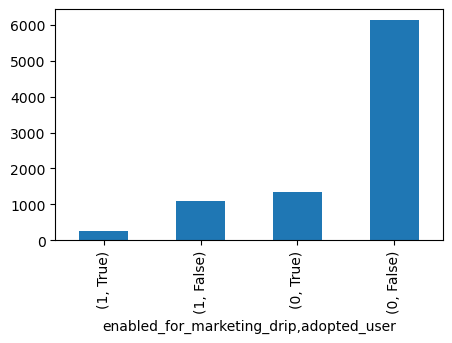

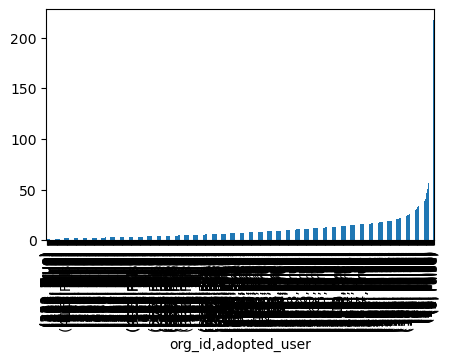

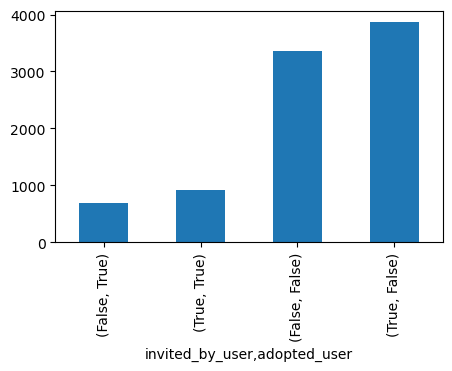

In [277]:
factors = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
        'org_id', 'invited_by_user']
# group by factors, then create a bar plot of the adopted user per factor
for factor in factors:
    plt.figure(figsize=(5, 3))
    # must do something like .mean() because cannot sort_values on a Series
    df.groupby(factor)['adopted_user'].value_counts().sort_values().plot(kind='bar')
    plt.show();

# Plot values are (factor, user_adopted) so i.e., (signup, True) is user who is adopted and signed up as a creation source
# Another example is "opted into mail list" (0, True) would be an adopted user who did *not* opt into the email list. 

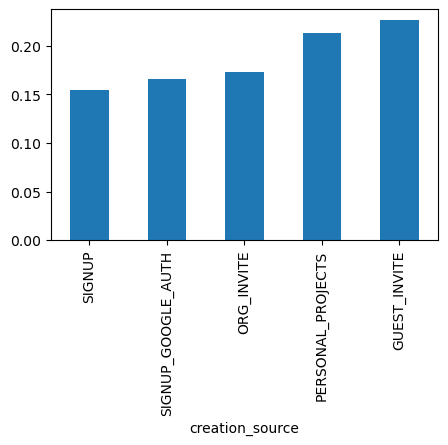

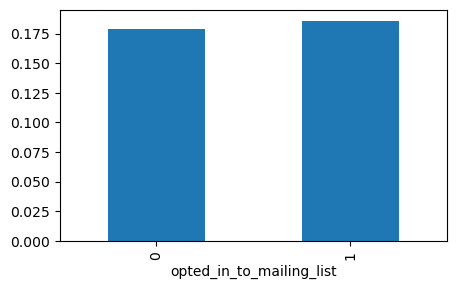

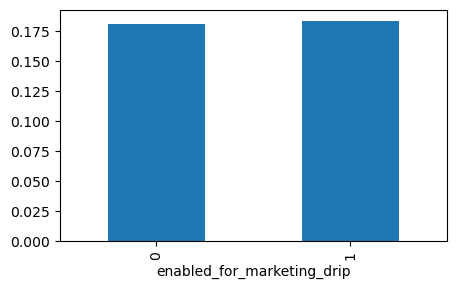

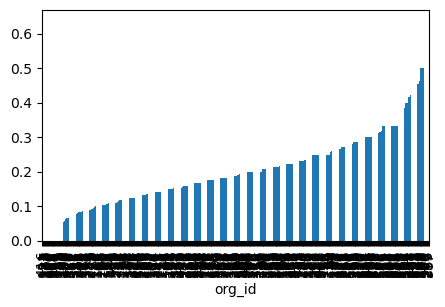

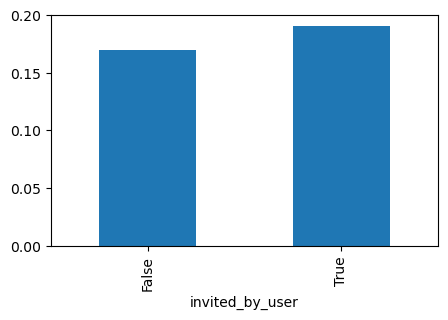

In [276]:
factors = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
        'org_id', 'invited_by_user']
# group by factors, then create a bar plot of the adopted user per factor
for factor in factors:
    plt.figure(figsize=(5, 3))
    # must do something like .mean() because cannot sort_values on a Series
    df.groupby(factor)['adopted_user'].mean().sort_values().plot(kind='bar')
    plt.show();


Factors of interest: 
- invited by user, org id, creation source

Factors that seem irrelevant:
- opting into mail list
- getting marketing emails